# Построение и анализ моделей беспроводных сетей 5G/6G
## Практическая работа №6
### Формула Кэмблелла для оценки интерференции

Быстров Глеб Андреевич
НФИмд-01-24
1132249517

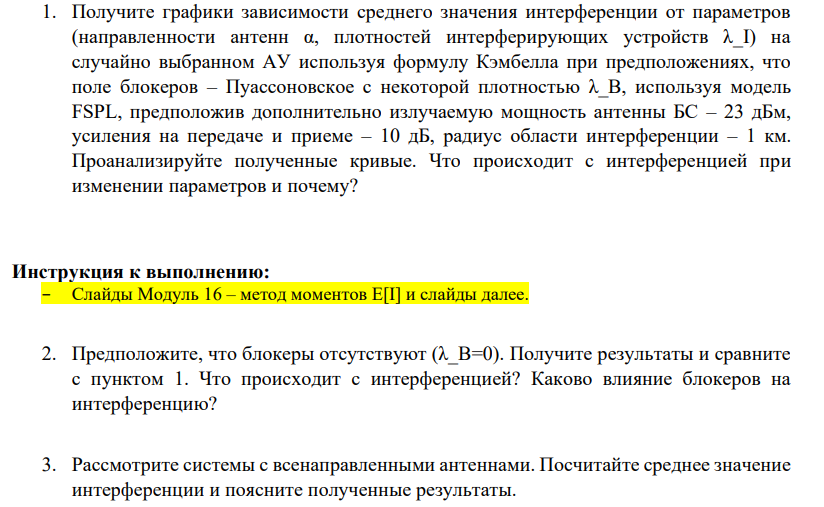

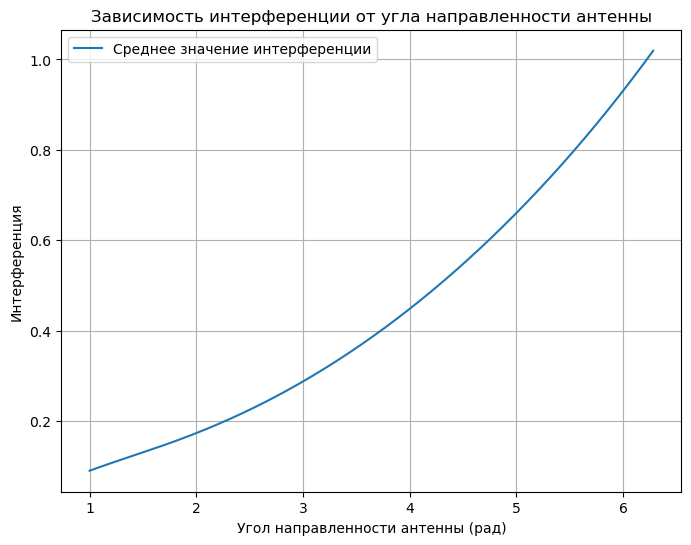

In [22]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

to_linear = lambda dB: 10 ** (dB / 10)

alpha_coefficient = 0.4
blocking_density = 0.2
radius_blockers = 1.5
radius_interference = 1000
transmission_gain = 23  
reception_gain = 10  
attenuation_factor = 0.1
attenuation_constant = 0.3

beam_pattern = lambda alpha: (alpha / (2 * math.pi)) ** 2
antenna_gain = lambda alpha: to_linear(2 / (1 - math.cos(alpha / 2) + attenuation_factor * (1 + math.cos(alpha / 2)))) * to_linear(reception_gain) * to_linear(transmission_gain) / (4 * math.pi) ** 2
signal_strength = lambda r: r ** (-2) * math.exp(-attenuation_constant * r)
blockage_probability = lambda r: math.exp(-2 * blocking_density * radius_blockers * (radius_blockers + r))
interference_integral = lambda r: signal_strength(r) * blockage_probability(r) * 2 * math.pi * r

def calculate_interference_vs_angle():
    angles = np.linspace(1, 2 * math.pi, 1000) 
    interference_values = []

    for angle in angles:
        integral_result, _ = quad(interference_integral, radius_blockers, radius_interference)
        interference_value = beam_pattern(angle) * blocking_density * antenna_gain(angle) * integral_result
        interference_values.append(interference_value)

    plt.figure(figsize=(8, 6))
    plt.plot(angles, interference_values, label="Среднее значение интерференции")
    plt.xlabel("Угол направленности антенны (рад)")
    plt.ylabel("Интерференция")
    plt.title("Зависимость интерференции от угла направленности антенны")
    plt.legend()
    plt.grid()
    plt.show()

calculate_interference_vs_angle()

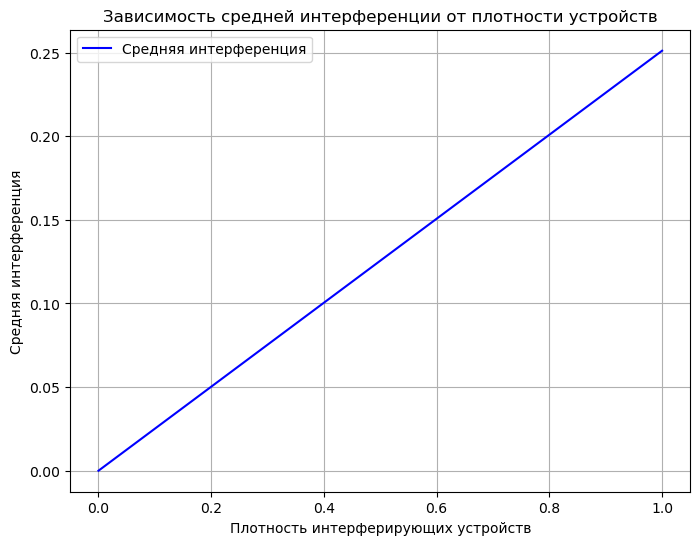

In [23]:
antenna_pattern = lambda angle: (angle / (2 * np.pi)) ** 2
antenna_gain = lambda angle: to_linear(2 / (1 - np.cos(angle / 2) + 0.1 * (1 + np.cos(angle / 2)))) * to_linear(10) * to_linear(23) / (4 * np.pi) ** 2
signal_model = lambda distance: distance ** (-2) * np.exp(-0.3 * distance)
blockage_model = lambda distance: np.exp(-2 * 0.2 * 1.5 * (1.5 + distance))
interference_function = lambda distance: signal_model(distance) * blockage_model(distance) * 2 * np.pi * distance

radius_min = 1.5
radius_max = 1000

def calculate_interference_vs_density():
    angles = 0.6 
    densities = np.linspace(0, 1, 1000)
    interference_values = []

    for density in densities:
        integral_result, _ = quad(interference_function, radius_min, radius_max)
        interference_value = antenna_pattern(angles) * density * antenna_gain(angles) * integral_result
        interference_values.append(interference_value)

    plt.figure(figsize=(8, 6))
    plt.plot(densities, interference_values, color="blue", label="Средняя интерференция")
    plt.xlabel("Плотность интерферирующих устройств")
    plt.ylabel("Средняя интерференция")
    plt.title("Зависимость средней интерференции от плотности устройств")
    plt.legend()
    plt.grid()
    plt.show()

calculate_interference_vs_density()

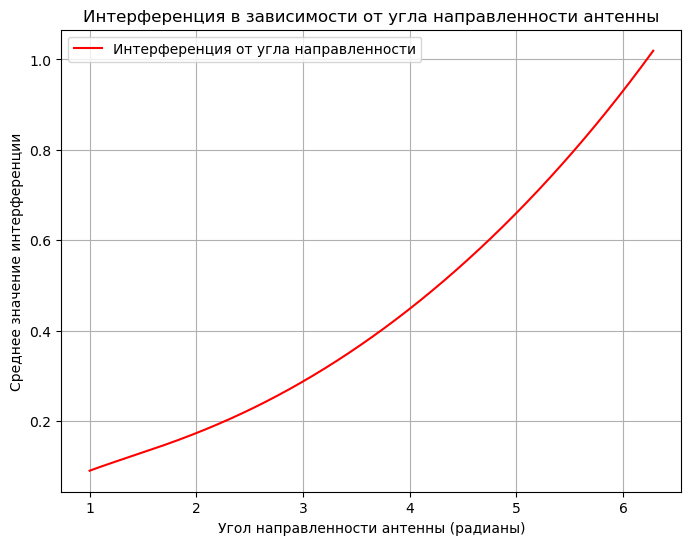

In [24]:
POINTS = 1000
block_density = 0

def calculate_interference_by_angle():
    device_density = 0.2 
    angles = np.linspace(1, 2 * np.pi, POINTS) 
    interference_values = np.zeros(POINTS)

    for idx in range(POINTS):
        current_angle = angles[idx]
        integral_value, _ = quad(interference_function, radius_min, radius_max)
        interference_values[idx] = beam_pattern(current_angle) * device_density * antenna_gain(current_angle) * integral_value

    plt.figure(figsize=(8, 6))
    plt.plot(angles, interference_values, color="red", label="Интерференция от угла направленности")
    plt.xlabel("Угол направленности антенны (радианы)")
    plt.ylabel("Среднее значение интерференции")
    plt.title("Интерференция в зависимости от угла направленности антенны")
    plt.legend()
    plt.grid()
    plt.show()

calculate_interference_by_angle()

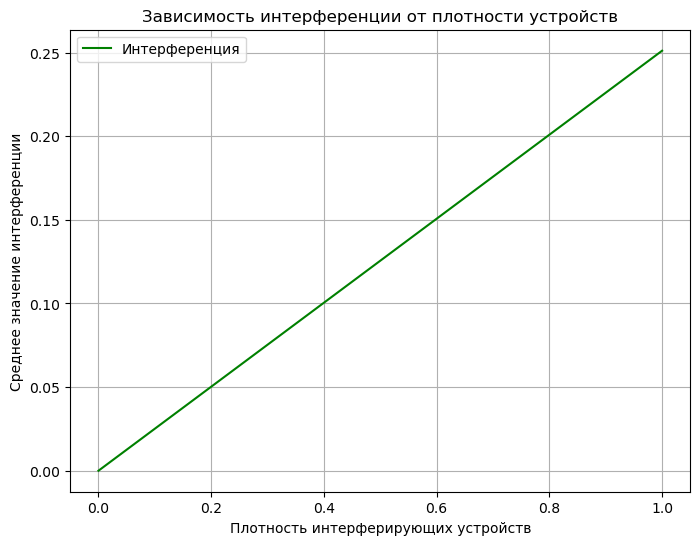

In [25]:
signal_strength = lambda r: r ** (-2) * np.exp(-0.3 * r)
blockage_probability = lambda r: np.exp(-2 * 0.2 * 1.5 * (1.5 + r))
interference_model = lambda r: signal_strength(r) * blockage_probability(r) * 2 * np.pi * r

NUM_POINTS = 1000

def calculate_interference_by_density():
    direction_angle = 0.6 
    densities = np.linspace(0, 1, NUM_POINTS)  
    interference_values = np.zeros(NUM_POINTS)

    for idx in range(NUM_POINTS):
        integral_result, _ = quad(interference_model, radius_min, radius_max)
        interference_values[idx] = angle_pattern(direction_angle) * densities[idx] * antenna_gain(direction_angle) * integral_result

    plt.figure(figsize=(8, 6))
    plt.plot(densities, interference_values, color="green", label="Интерференция")
    plt.xlabel("Плотность интерферирующих устройств")
    plt.ylabel("Среднее значение интерференции")
    plt.title("Зависимость интерференции от плотности устройств")
    plt.legend()
    plt.grid()
    plt.show()

calculate_interference_by_density()

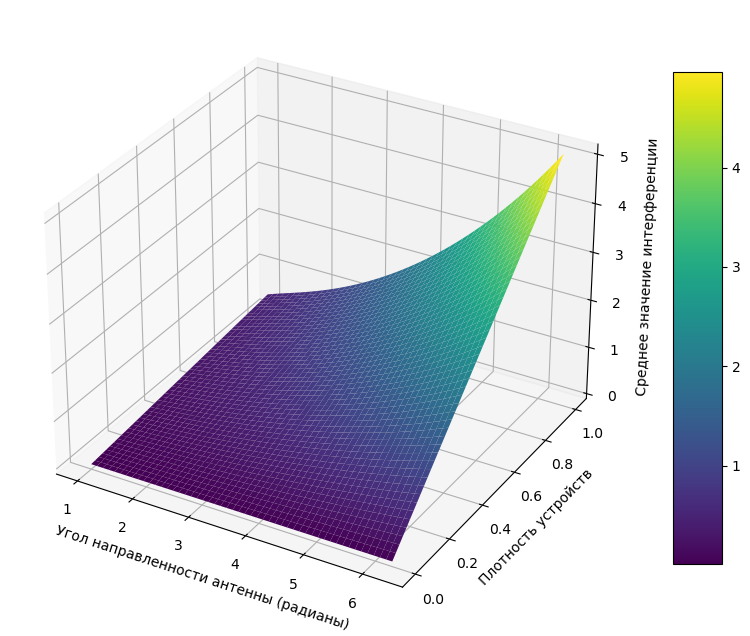

In [26]:
NUM_POINTS = 1000
angles_range = np.linspace(1, 2 * np.pi, NUM_POINTS)
densities_range = np.linspace(0, 1, NUM_POINTS)

angles_mesh, densities_mesh = np.meshgrid(angles_range, densities_range)

beam_pattern = lambda angle: (angle / (2 * np.pi)) ** 2
antenna_gain = lambda angle: to_linear(2 / (1 - np.cos(angle / 2) + 0.1 * (1 + np.cos(angle / 2)))) * to_linear(10) * to_linear(23) / (4 * np.pi) ** 2
signal_strength = lambda r: r ** (-2) * np.exp(-0.3 * r)

interference_values = np.zeros((NUM_POINTS, NUM_POINTS))
temp_integral, _ = quad(interference_model, radius_min, radius_max)

for i in range(NUM_POINTS):
    for j in range(NUM_POINTS):
        interference_values[i, j] = temp_integral * beam_pattern(angles_mesh[i, j]) * densities_mesh[i, j] * antenna_gain(angles_mesh[i, j])

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

surface_plot = ax.plot_surface(angles_mesh, densities_mesh, interference_values, cmap='viridis')
color_bar = fig.colorbar(surface_plot, ax=ax, shrink=0.8, aspect=10)

ax.set_xlabel("Угол направленности антенны (радианы)")
ax.set_ylabel("Плотность устройств")
ax.set_zlabel("Среднее значение интерференции")

plt.show()

#### Заключение

1. График зависимости интерференции от угла направленности антенны:
* Интерференция увеличивается с увеличением угла направленности антенны. Это связано с тем, что при большем угле направленности захватывается больше сигналов от интерферирующих устройств, увеличивая среднюю интерференцию.

2. График зависимости средней интерференции от плотности интерферирующих устройств:
* Интерференция возрастает с увеличением плотности устройств.
* При высокой плотности большее количество устройств создаёт шум, что приводит к увеличению средней интерференции.

3. График зависимости интерференции от угла направленности антенны и плотности устройств:
* Взаимосвязь этих параметров подтверждает, что наибольшая интерференция наблюдается при высоких значениях плотности устройств и большом угле направленности антенны. Это подчеркивает важность учета обоих факторов при проектировании систем связи.

Угол направленности антенны и плотность интерферирующих устройств являются ключевыми факторами, влияющими на уровень интерференции. Для минимизации интерференции в реальных системах связи важно оптимизировать настройки антенн и учитывать плотность устройств в окружающей среде. Полученные результаты подтверждают необходимость анализа этих параметров для повышения эффективности сетей связи.